## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress
from sklearn import datasets
%matplotlib notebook
%matplotlib inline
from pandas.plotting import table


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df,study_results_df, how="outer", on="Mouse ID")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

# duplicate_mice = study_results_df[study_results_df.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
# duplicate_mice[['Mouse ID', 'Timepoint']]

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate = pd.DataFrame(duplicate_mice)
all_duplicate

,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data_df= combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mice)==False]
cleaned_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = cleaned_data_df["Mouse ID"].nunique()
new_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drug_group = cleaned_data_df.groupby("Drug Regimen")

dru_mean = drug_group["Tumor Volume (mm3)"].mean()
dru_median = drug_group["Tumor Volume (mm3)"].median()
dru_var = drug_group["Tumor Volume (mm3)"].var()
dru_std = drug_group["Tumor Volume (mm3)"].std()
dru_sem = drug_group["Tumor Volume (mm3)"].sem()


summary_stats_df = pd.DataFrame = ({"Mean": dru_mean, "Median": dru_median, 
                                    "Variance":dru_var, "Standard Deviation": dru_std, "SEM":dru_sem})


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

single_line_grp = cleaned_data_df.groupby("Drug Regimen")

summary_table = single_line_grp.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

summary_table.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

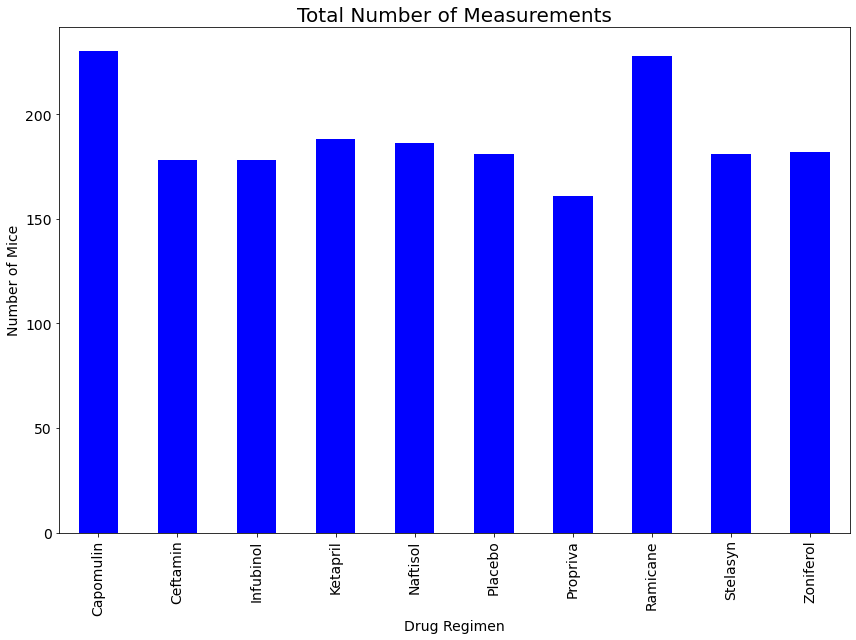

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_reg_total = combined_data_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"] 

pandas_plot = drug_reg_total.plot.bar(figsize=(12,9), color='b',fontsize = 14)
pandas_plot
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Total Number of Measurements",fontsize = 20)
plt.tight_layout()
plt.show()


In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

mice_list =(combined_data_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()).tolist()
mice_list

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Number of Mice')

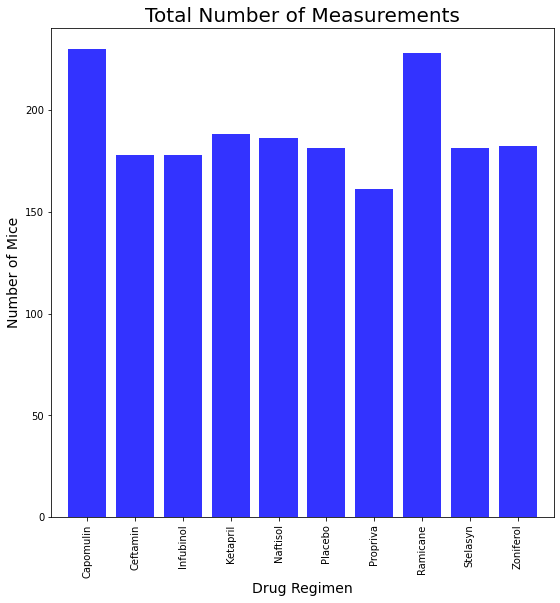

In [20]:
x_axis = np.arange(len(drug_reg_total))
fig1, ax1 = plt.subplots(figsize=(9, 9))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Total Number of Measurements",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)


[Text(0, 0.5, '')]

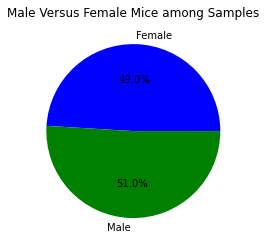

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Give a title to the chart
pie_title = "Male Versus Female Mice among Samples"

#Group the mice by gender
gender_grp = cleaned_data_df.groupby(["Sex"])

#Get the count of the gender
gender_count = gender_grp.count()

#Column neede fo the chart
column_name = gender_count.columns[0]

#Change the neame of the column 
gender_count = gender_count.rename(columns={column_name: 'Number of Data Points'})

#Plot the chart
ax = gender_count.plot.pie(y='Number of Data Points',autopct="%1.1f%%",title = pie_title, legend=False, colors = ["blue", "green"])
ax.set(ylabel="")

Text(0.5, 1.0, 'Male Versus Female Mice among Samples')

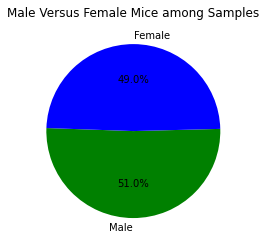

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ['Male','Female']

# The values of each section of the pie chart
sizes = [gender_count.loc['Male']['Number of Data Points'], gender_count.loc['Female']['Number of Data Points']]

plt.pie(sizes, labels=labels, autopct="%1.1f%%",startangle=178, colors = ["green", "blue"])
plt.title(pie_title)

## Quartiles, Outliers and Boxplots

In [14]:
# # Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# # Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse
# max_cap = cleaned_data_df.groupby("Mouse ID").max()["Timepoint"]

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merge_reg = pd.merge(max_cap, cleaned_data_df, on="Timepoint" ) 

# drug_vol = merge_reg[(merge_reg["Drug Regimen"] == "Capomulin") |
#                                                  (merge_reg["Drug Regimen"] == "Ramicane") |
#                                                  (merge_reg["Drug Regimen"] == "Infubinol") |
#                                                  (merge_reg["Drug Regimen"] == "Ceftamin")]                                         



# tumor_vol=drug_vol[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
# tumor_vol

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list = tumor_vol["Drug Regimen"].unique().tolist()

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = tumor_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
   

NameError: name 'tumor_vol' is not defined

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Locate each drug regimen in the dataframe

cap_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Capomulin",:]
Ram_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Ramicane",:]
Infu_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Infubinol",:]
ceft_df = cleaned_data_df.loc[cleaned_data_df["Drug Regimen"] == "Ceftamin",:]

# For Capomulin regimen
# Start by getting the last (greatest) timepoint for each mouse
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_vol = pd.DataFrame(caplast)
cap_merge = pd.merge(cap_vol, cleaned_data_df, on=("Mouse ID","Timepoint"),how="left")
# cap_merge.head()

cap_df.head()

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
